### **What is time series data?**
- A sequence of data points collected at successive, equally spaced points in time.
- Recorded at regular intervals such as daily, hourly, monthly, or yearly.
- Examples include rainfall, sales figures, daily temperature, stock prices, etc
e,g Rainfall,sales, daily temperature

### **Time Index and Frequency**

- **Time Index** refers to the labels (timestamps) that identify each observation in a time series. This index is usually a datetime object representing when the data was recorded.
- **Frequency** describes how often the data points are collected. Common frequencies include:
  - **Yearly** (`'A'` or `'Y'`)
  - **Quarterly** (`'Q'`)
  - **Monthly** (`'M'`)
  - **Weekly** (`'W'`)
  - **Daily** (`'D'`)
  - **Hourly** (`'H'`)
  - **Minutes** (`'T'` or `'min'`)
  - **Seconds** (`'S'`)
- Specifying the correct frequency is important for time series analysis because many statistical methods rely on knowing the regular spacing of observations.


**Example**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
time_data =pd.read_csv('book_sales.csv')

In [ ]:
time_data['Date'] = pd.to_datetime(time_data['Date'])
time_data.set_index('Date', inplace=True)

In [14]:
time_data.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


In [17]:
df_2000 = time_data.loc['2000']

### **How does time series data differ from normal data?**

- In time series data, the order of observations matters, because past values influence future values.
- Normal (cross-sectional) data usually assumes observations are independent of each other, with no inherent order.

### **Components of time series data**

There are 3 main componets we check for in our data when we are doing analysis ,this include
- Trends
- Seasonality
- Noise/Irregularity

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
decomposition = seasonal_decompose(df_2000['Paperback'], model='additive', period=7)

**Trends** : Long term increase or decrease
- The long-term movement in the data.
- Smoothed version of the series without seasonality or noise.

In [20]:
df_2000.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


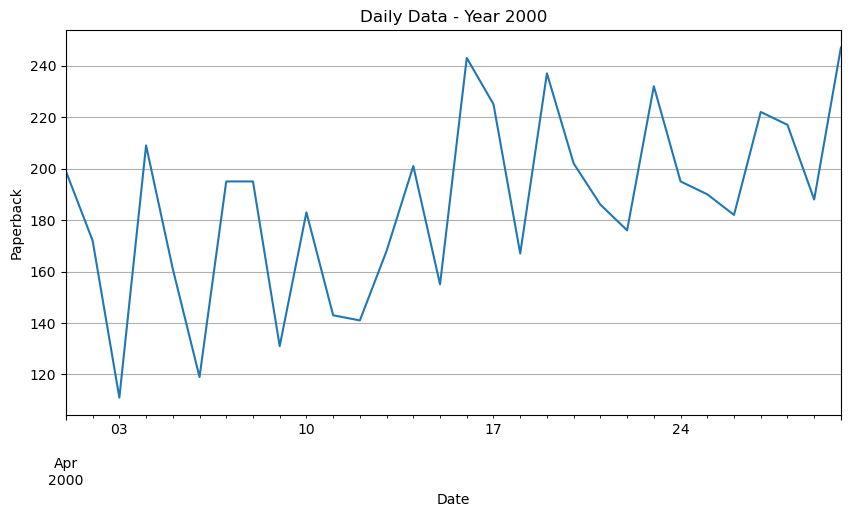

In [29]:
df_2000['Paperback'].plot(title='Daily Data - Year 2000', figsize=(10,5))
plt.ylabel('Paperback')
plt.grid(True)
plt.show()

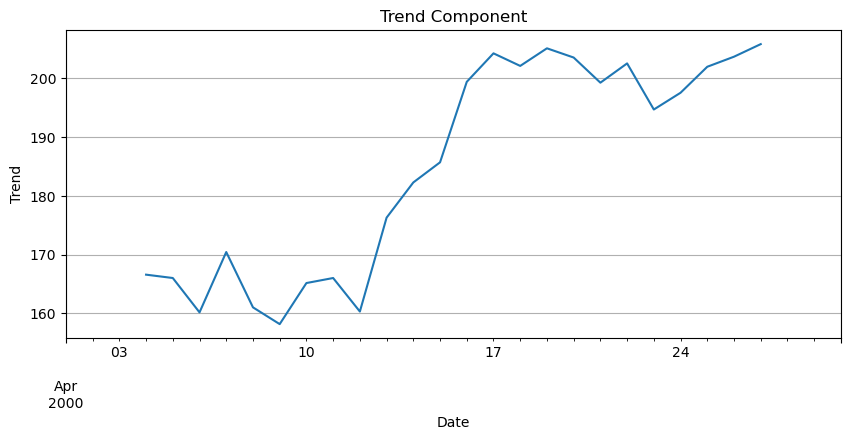

In [32]:
decomposition.trend.plot(title='Trend Component', figsize=(10,4))
plt.ylabel('Trend')
plt.grid(True)
plt.show()

**Seasonality**: Regular patterns that repeat( daily ,weekly or monthly)

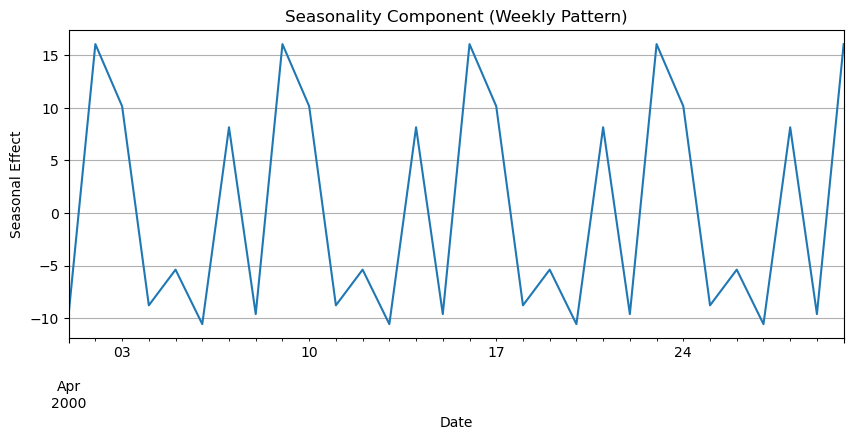

In [33]:
plt.figure(figsize=(16, 12))
decomposition.seasonal.plot(title='Seasonality Component (Weekly Pattern)', figsize=(10,4))
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.show()

**Noise/Irregularity**: random variation in data including
- Random fluctuations
- Outliers
- Any pattern not explained by trend or seasonality

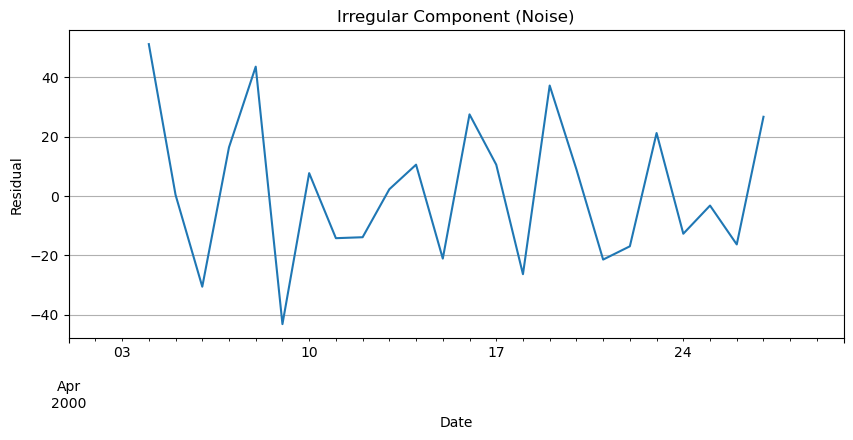

In [34]:
plt.figure(figsize=(16, 12))
decomposition.resid.plot(title='Irregular Component (Noise)', figsize=(10,4))
plt.ylabel('Residual')
plt.grid(True)
plt.show()

---

### **Stationarity**

- A time series is **stationary** if its statistical properties do not change over time.
- This means the series has:
  - A constant **mean** (average value)
  - A constant **variance** (spread or volatility)
  - A constant **autocovariance** structure (relationship between values at different times depends only on the lag, not on time itself)

- Stationarity is important because many time series models (like ARIMA) assume the data is stationary for accurate forecasting.
- **Types of stationarity:**
  - **Strict stationarity:** The entire distribution of the series does not change over time.
  - **Weak (or wide-sense) stationarity:** Only the first two moments (mean and variance) are constant over time.

- **Non-stationary data** often shows trends, seasonality, or changing variance.
- To analyze or model non-stationary data, you often need to **transform** it into a stationary series using techniques like:
  - Differencing
  - Detrending
  - Seasonal adjustment
  - Log transformations
 

In [35]:
from statsmodels.tsa.stattools import adfuller

In [37]:

result = adfuller(time_data['Hardcover'].dropna())

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.094374634747436
p-value: 0.02697230130906717
Critical Values:
   1%: -3.6790595944893187
   5%: -2.9678817237279103
   10%: -2.6231583472057074


- If the p-value is less than your significance level (e.g., 0.05), reject H0 → data is likely stationary
- If the ADF statistic is less than the critical value at a given confidence level, it supports stationarity

---

### **EDA for Time Series**

Exploratory Data Analysis (EDA) for time series involves understanding the structure, patterns, and key characteristics of the data over time. Common steps include:

- **Plotting the time series**  
  Visualize the raw data to observe overall trends, seasonality, and anomalies.

- **Checking for missing values and irregularities**  
  Identify and handle gaps or inconsistencies in the time index or values.

- **Summary statistics**  
  Calculate mean, median, variance, and other statistics to understand distribution and variability.

- **Decomposition**  
  Break down the series into trend, seasonality, and residual components to analyze each separately.

- **Stationarity testing**  
  Use tests like Augmented Dickey-Fuller (ADF) to check if the series is stationary.

- **Autocorrelation analysis**  
  Plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to understand dependencies between observations at different lags.

- **Rolling statistics**  
  Compute and plot rolling mean and rolling standard deviation to detect changes in mean or variance over time.
 

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**Autocorrelation Function**

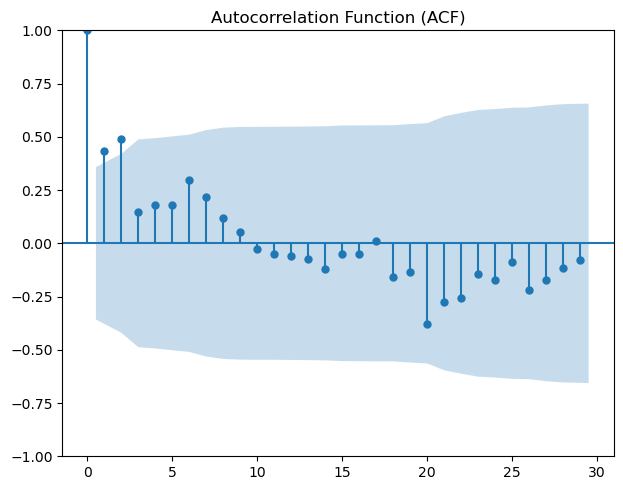

In [48]:
series = df_2000['Hardcover'].dropna()

lags_to_use = min(40, len(series) - 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(series, lags=lags_to_use, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.tight_layout()
plt.show()

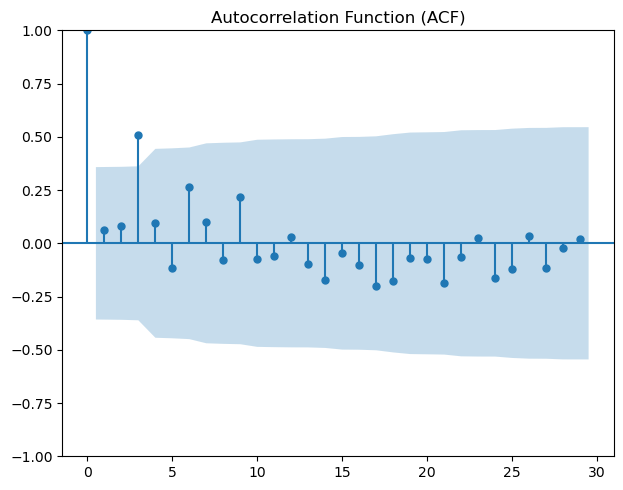

In [47]:
series = df_2000['Paperback'].dropna()

lags_to_use = min(40, len(series) - 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(series, lags=lags_to_use, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.tight_layout()
plt.show()

**Rolling mean**

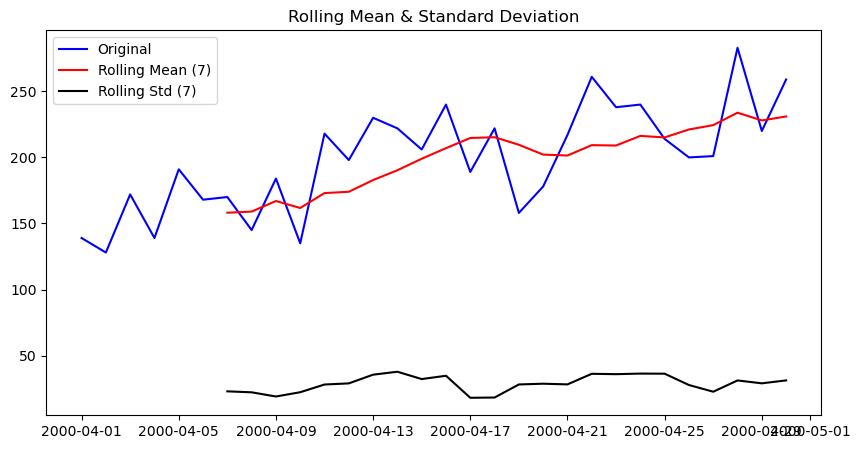

In [49]:
window = 7
rolling_mean = series.rolling(window=window).mean()
rolling_std = series.rolling(window=window).std()

plt.figure(figsize=(10,5))
plt.plot(series, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label=f'Rolling Mean ({window})')
plt.plot(rolling_std, color='black', label=f'Rolling Std ({window})')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()
